## Chapter 1
This notebook contains notes and examples from chapter 1 from the book:
### An Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly). 
Copyright 2017 Sarah Guido and Andreas Müller, 978-1-449-36941-5.



Notes: 

Machine learning algorithms that learn from input/output pairs arecalled supervised learning algorithms because a “teacher” providessupervision to the algorithms in the form of the desired outputs foreach example that they learn from. 

In unsupervised learning, only the input data is known, and no known output data is given to the algorithm.

Often it is helpful to think of your data as a table. Each data point that you want to reason about (each email, each customer, each transaction) is a row, and each property that describes that data point (say, the age of a customer or the amount or location of a transaction) is a column.
 
Each entity or row here is known as a sample (or data point) in machine learning, while the columns—the properties that describe these entities—are called features.

building a good representation of your data, is called feature extraction or feature engineering.


Quite possibly the most important part in the machine learning process is understanding the data you are working with and how it relates to the task you want to solve. It will not be effective to randomly choose an algorithm and throw your data at it. It is necessary to understand what is going on in your dataset before you begin building a model. Each algorithm is different in terms of what kind of data and what problem setting it works best for. While you are building a machine learning solution, you should answer, or at least keep in mind, the following questions:

    What question(s) am I trying to answer? Do I think the data collected can answer that question?

    What is the best way to phrase my question(s) as a machine learning problem?

    Have I collected enough data to represent the problem I want to solve?

    What features of the data did I extract, and will these enable the right predictions?

    How will I measure success in my application?

    How will the machine learning solution interact with other parts of my research or business product?



Links:
https://scikit-learn.org/stable/index.html

https://scikit-learn.org/stable/user_guide.html

https://github.com/amueller/introduction_to_ml_with_python

http://scipy-lectures.org/

[Python for Data analysis by Wes McKinney](http://shop.oreilly.com/product/0636920023784.do)


In [1]:
!pip list
!which python

Package            Version
------------------ ----------
appdirs            1.4.4
attrs              19.3.0
backcall           0.1.0
black              19.10b0
bleach             3.1.5
blis               0.4.1
catalogue          1.0.0
certifi            2020.4.5.1
chardet            3.0.4
click              7.1.2
cycler             0.10.0
cymem              2.0.3
decorator          4.4.2
defusedxml         0.6.0
entrypoints        0.3
flake8             3.8.1
graphviz           0.14
idna               2.9
imageio            2.8.0
ipykernel          5.2.1
ipython            7.14.0
ipython-genutils   0.2.0
ipywidgets         7.5.1
jedi               0.17.0
Jinja2             2.11.2
joblib             0.15.1
jsonschema         3.2.0
jupyter            1.0.0
jupyter-client     6.1.3
jupyter-console    6.1.0
jupyter-core       4.6.3
kiwisolver         1.2.0
MarkupSafe         1.1.1
matplotlib         3.2.1
mccabe             0.6.1
mglearn            0.1.7
mistune            0.8.4
murmurhash

In [2]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
print(f'x:\n{x}')


x:
[[1 2 3]
 [4 5 6]]


In [3]:
from scipy import sparse

# create a numpy array with ones in the diagonal and zeroes everwhere else - Identity matrix
eye = np.eye(4)
print(f'Numpy Array:\n {eye}')


Numpy Array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print(f'Scipy sparse CSR matrix:\n{sparse_matrix}')

Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
# sometimes it may not be possible to create dense represnetaion of sparse data due to memory restrictions
# How to create sparse matrix directly

data = np.ones(4)
row_indices = np.arange(4)
column_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, column_indices)))
print(f'COO representation:\n{eye_coo}')

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


<IPython.core.display.Javascript object>


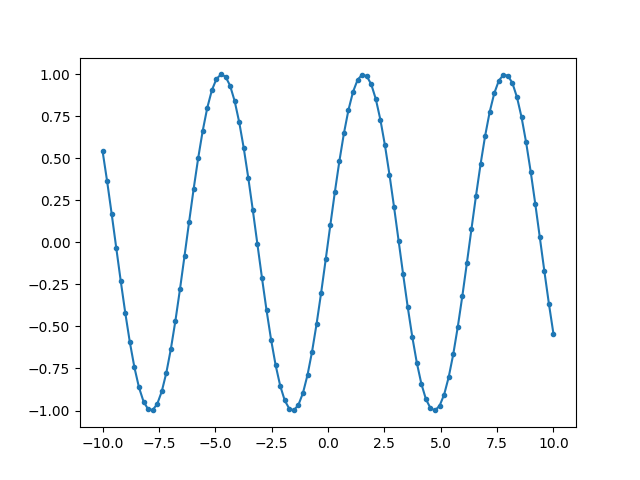

In [6]:
%matplotlib notebook
from matplotlib import pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create secondary array using sine
y = np.sin(x)
# plot function makes a line chart of x against y
plt.plot(x, y, marker = '.')


In [7]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

df = pd.DataFrame(data)
display(df)

display(df[df.Age > 30])

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.8.2 (default, Feb 26 2020, 02:56:10) 
[GCC 7.4.0]
pandas version: 1.0.3
matplotlib version: 3.2.1
NumPy version: 1.18.4
SciPy version: 1.4.1
IPython version: 7.14.0
scikit-learn version: 0.23.0


## Classifying Iris Species
Data set has leng and width of sepal and petal belonging to the species *setosa, versicolor, or virginica*. Assume that these are the only 3 species. Build a machine learning model that can predict the species of a new iris. 

We have training data => this is a **supervised learning problem**

We want to predict one of the 3 options for new iris => This is a **classification problem**

Possible outputs *setosa, versicolor, or virginica* => **classes** This is a three class classification problem

For a perticular **data point** , the specieis it belongs to => **label**

Iris dataset is a classical data set used as an example in statistics and machine learning. 
https://en.wikipedia.org/wiki/Iris_flower_data_set




In [9]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(type(iris_dataset))
# bunch datatype
help("sklearn.utils.Bunch")

<class 'sklearn.utils.Bunch'>
Help on class Bunch in sklearn.utils:

sklearn.utils.Bunch = class Bunch(builtins.dict)
 |  sklearn.utils.Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, valu

In [10]:
print(f'Keys of the Iris dataset:\n{iris_dataset.keys()}')


Keys of the Iris dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
print(iris_dataset.DESCR[:120])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 15


In [12]:
print(f'Target Names: \n{iris_dataset.target_names}')

Target Names: 
['setosa' 'versicolor' 'virginica']


In [13]:
print(f'Feature Names:\n{iris_dataset.feature_names}')

Feature Names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
# data contains data points- measurements of petals and sepals
print('Type of data' , type(iris_dataset.data))
print('Shape of data', iris_dataset.data.shape)



Type of data <class 'numpy.ndarray'>
Shape of data (150, 4)


We have 150 **samples** with 4 **features** each

In [15]:
print(f'First five rows of data:\n{iris_dataset.data[:5]}')

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
# target contains species of each flower 
print('Type of data' , type(iris_dataset.target))
print('Shape of data', iris_dataset.target.shape)


Type of data <class 'numpy.ndarray'>
Shape of data (150,)


Target is a one dimentional array with 150 **labels** one for each **sample**

0 means setosa, 1 means versicolor, and 2 means virginica

In [17]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


We split the data into 2 sets:

One part is used to train the model, and called as **training data**  or training set.

The remaining data will be used to assess how well the model works. This is called as **testing data** or testing set  

scikit learn has a function **train_test_split** to shuffle and split the data into 75% training data and 25% testing data.

convention: Use X for data and y for labels. Inspired by f(x)=y in mathematics.  X is a mtrix and y is vector.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0)

# random_state = 0 is the seed to pseudorandom number generator that is used to shuffle the data. 

# This makes the shuffling deterministinc. We can run the above line and get same result every time we run.

In [19]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


Inspect the data tpo see if has any abnormalities or peculiarities. One way to inspect is to visualize the data, eg. scatter plot.  pair plot -  looks at all possible pairs of features.



<IPython.core.display.Javascript object>


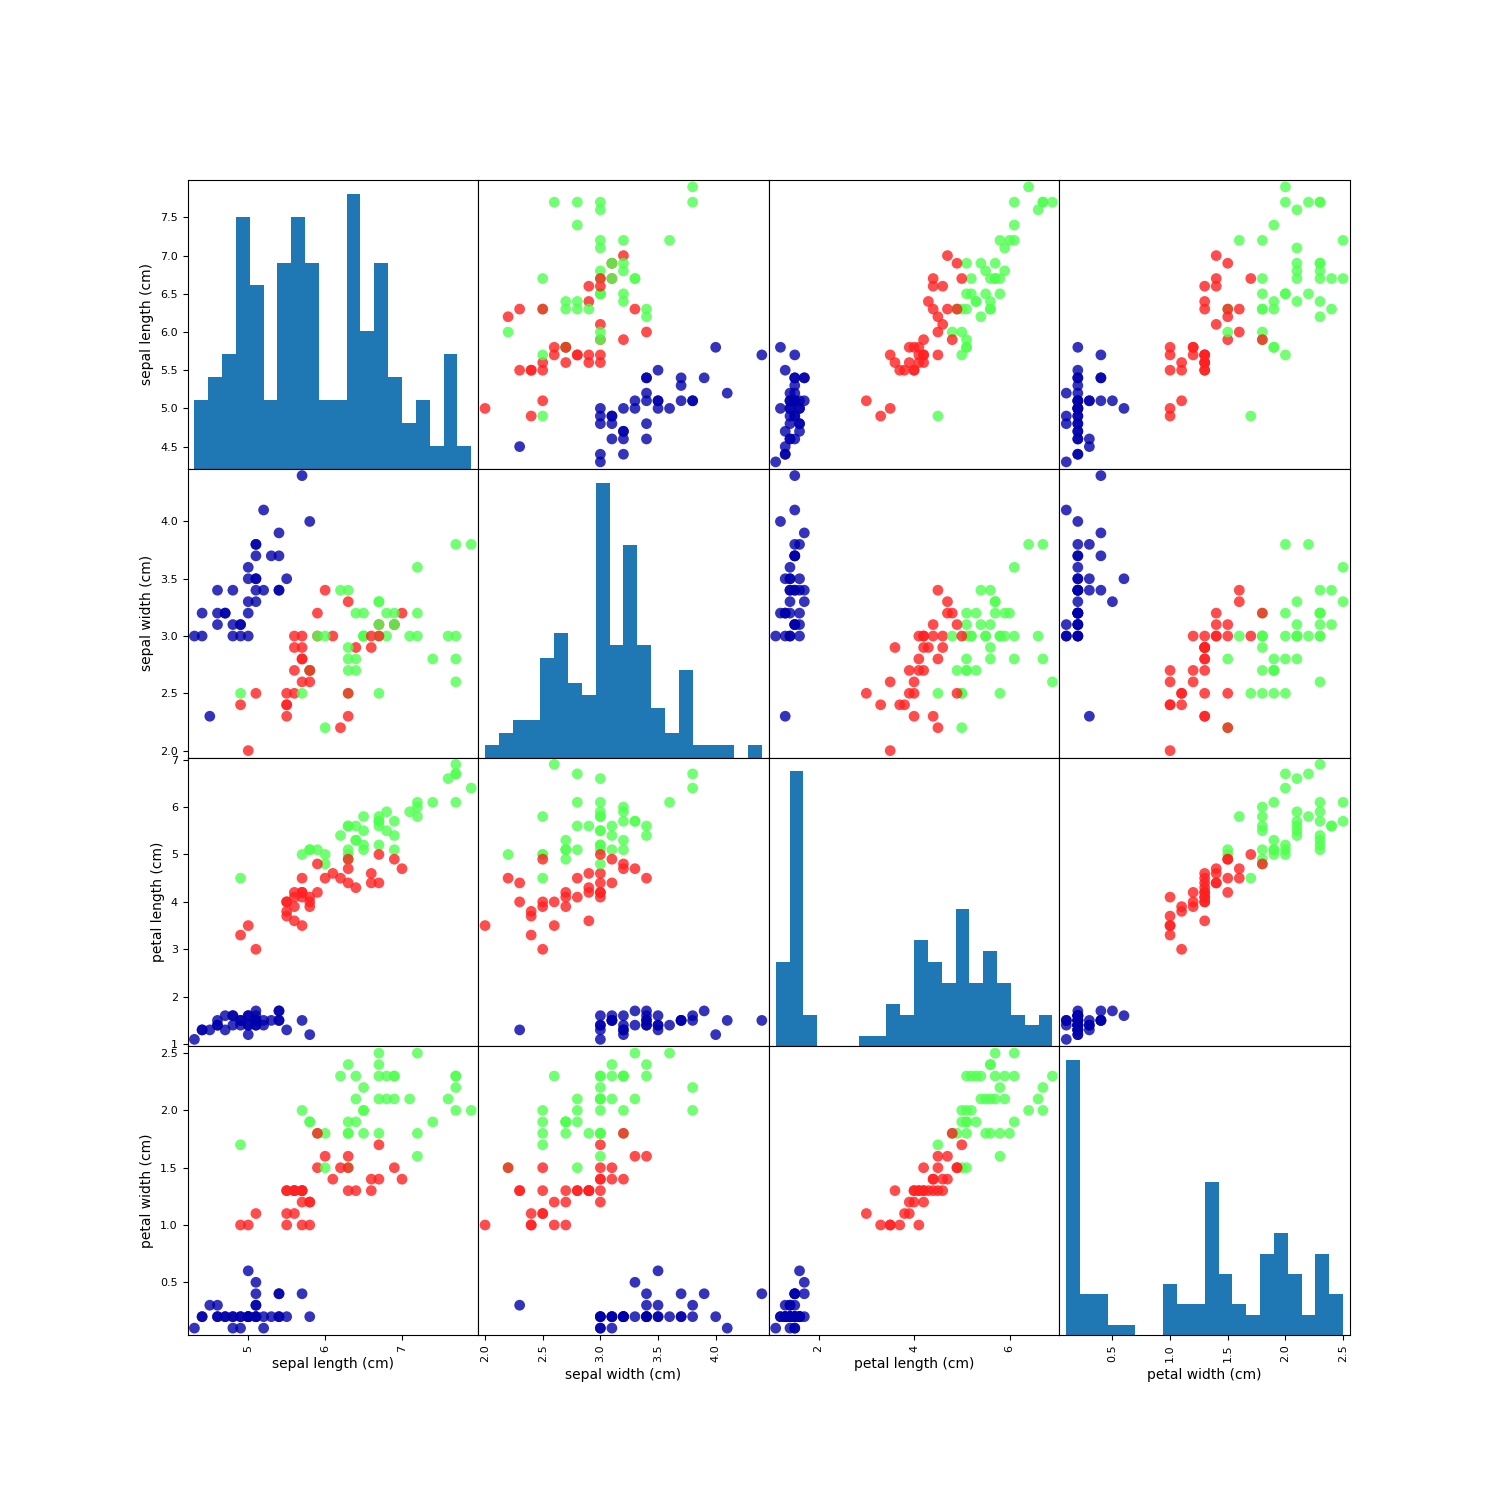

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc706d58e80>,
      dtype=object)

In [25]:
import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

# I had to update few source files inside mglearn to get this running


## k-nearest neighbors classifier
To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

Machine learning models in scikit-learn are implemented in their own classes, called Estimator classes. We need to instantiate the class into an object.



In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object has: 
 - the algorithm that will be used to build the model from the training data
 - the algorithm to make predictions on new data points
 - the information that the algorithm has extracted from the training data.

In [22]:
# build the model using training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [23]:
# make prediction using this model for new data points
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


Evaluate the model using test data and compute accuracy 


In [24]:
y_pred = knn.predict(X_test)
print(f'Test set predictions:\n{y_pred}')

print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97
